Лабораторная работа 9.1 Титаник ML
1. Загрузить файл, разделить его на train и test. Для test взять 10% случайно выбранных строк таблицы.
2. Обучить модели: Decision Tree, XGBoost, Logistic Regression из библиотек sklearn и xgboost. Обучить модели предсказывать столбец label по остальным столбцам таблицы.
3. Наладить замер Accuracy - доли верно угаданных ответов.
4. Точности всех моделей не должны быть ниже 85%
5. С помощью Decision Tree выбрать 2 самых важных признака и проверить точность модели, обученной только на них.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [70]:
from sklearn.model_selection import train_test_split

def split_data(X_scaled, y):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=1)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [71]:
def scale_data(X):
    scaler = MinMaxScaler()
    return scaler.fit_transform(X)

In [72]:
def get_accuracy(model, X_test, y_test):
    predict = model.predict(X_test)
    return accuracy_score(y_test, predict)

In [73]:
df_main = pd.read_csv('data/titanic_prepared.csv').drop(['Unnamed: 0', 'check_number'], axis=1)
df_main.head()

,sex,row_number,liters_drunk,drink,label,age_child,age_adult,age_old,morning,day,evening
0,0,90.0,1.0,1,1,False,False,True,False,False,True
1,0,81.0,4.0,1,1,False,True,False,False,True,False
2,1,14.0,3.0,0,1,False,False,True,False,False,True
3,1,0.0,1.0,0,1,False,False,True,False,True,False
4,1,84.0,1.0,0,0,False,False,True,True,False,False


In [74]:
y = df_main['label']
X = df_main.drop(['label'], axis=1)
X = X.astype(int)
X

,sex,row_number,liters_drunk,drink,age_child,age_adult,age_old,morning,day,evening
0,0,90,1,1,0,0,1,0,0,1
1,0,81,4,1,0,1,0,0,1,0
2,1,14,3,0,0,0,1,0,0,1
3,1,0,1,0,0,0,1,0,1,0
4,1,84,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
6629,1,55,2,0,0,0,1,0,0,1
6630,1,75,5,1,0,0,1,0,1,0
6631,1,1,2,1,0,1,0,1,0,0
6632,1,68,4,0,0,1,0,0,1,0


In [75]:
X_scaled = scale_data(X)
X_train, X_val, X_test, y_train, y_val, y_test = split_data(X_scaled, y)

In [76]:
from sklearn.model_selection import GridSearchCV

XGBoost

In [77]:
from xgboost import XGBClassifier
def xgb(X_train, X_val, y_train, y_val):
    clf = XGBClassifier()
    parameters = {
        'max_depth': range(2, 10, 1),
        'n_estimators': range(60, 220, 40),
        'learning_rate': [0.1, 0.01, 0.05]
    }
    grid = GridSearchCV(clf, parameters, cv=5)
    grid.fit(X_train, y_train)
    max_depth = grid.best_params_.get('max_depth')
    n_estimators = grid.best_params_.get('n_estimators')
    learning_rate = grid.best_params_.get('learning_rate')
    model = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth,
                          learning_rate=learning_rate)
    model.fit(X_train, y_train)
    predict = model.predict(X_val)
    acc = accuracy_score(y_val, predict)
    print(f'Лучшие параметры:\n{grid.best_params_}')
    print('Лучшая accuracy на валидации: {:.2%}'.format(acc))
    return model

In [78]:
model = xgb(X_train, X_val, y_train, y_val)
acc = get_accuracy(model, X_test, y_test)
print('Accuracy на тесте: {:.2%}'.format(acc))

Лучшие параметры:
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 60}
Лучшая accuracy на валидации: 90.45%
Accuracy на тесте: 90.36%


Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression
def logistic_regression(X_train, X_val, y_train, y_val):
    clf = LogisticRegression()
    parameters = {
        'C': np.arange(0.01, 1, 0.01),
        'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
    }
    grid = GridSearchCV(clf, parameters, cv=5)
    grid.fit(X_train, y_train)
    C = grid.best_params_.get('C')
    solver = grid.best_params_.get('solver')
    model = LogisticRegression(C=C, solver=solver)
    model.fit(X_train, y_train)
    predict = model.predict(X_val)
    acc = accuracy_score(y_val, predict)
    print(f'Лучшие параметры:\n{grid.best_params_}')
    print('Лучшая accuracy на валидации: {:.2%}'.format(acc))
    return model

In [80]:
model = logistic_regression(X_train, X_val, y_train, y_val)
acc = get_accuracy(model, X_test, y_test)
print('Accuracy на тесте: {:.2%}'.format(acc))

Лучшие параметры:
{'C': 0.02, 'solver': 'liblinear'}
Лучшая accuracy на валидации: 87.10%
Accuracy на тесте: 86.60%


Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
def decision_tree(X_train, X_val, y_train, y_val):
    clf = DecisionTreeClassifier()
    parameters = {
        'max_depth': range(1, 13, 2),
        'min_samples_leaf': range(1, 8),
        'min_samples_split': range(2, 10, 2),
        'criterion': ['gini', 'entropy', 'log_loss']
    }
    grid = GridSearchCV(clf, parameters, cv=5)
    grid.fit(X_train, y_train)
    max_depth = grid.best_params_.get('max_depth')
    min_samples_leaf = grid.best_params_.get('min_samples_leaf')
    min_samples_split = grid.best_params_.get('min_samples_split')
    criterion = grid.best_params_.get('criterion')
    model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth,
                                   min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
    model.fit(X_train, y_train)
    predict = model.predict(X_val)
    acc = accuracy_score(y_val, predict)
    print(f'Лучшие параметры:\n{grid.best_params_}')
    print('Лучшая accuracy: {:.2%}'.format(acc))
    return model

In [83]:
model = decision_tree(X_train, X_val, y_train, y_val)
acc = get_accuracy(model, X_test, y_test)
print('Accuracy: {:.2%}'.format(acc))

Лучшие параметры:
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 2}
Лучшая accuracy: 90.12%
Accuracy: 90.36%


Decision Tree (2 признака)

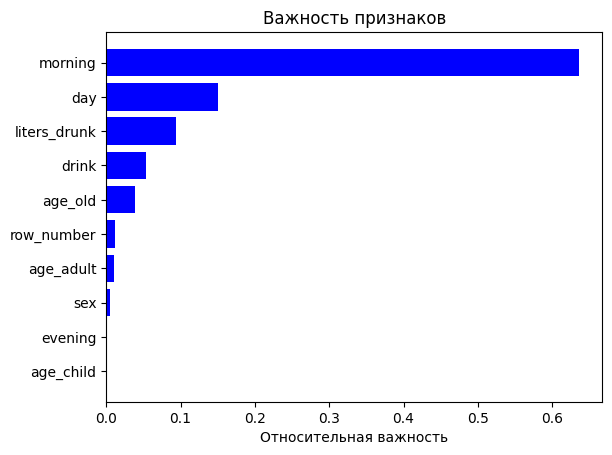

In [84]:
importances = model.feature_importances_
features = X.columns

# Добавление сортировки по важности
indices = np.argsort(importances)

plt.title('Важность признаков')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Относительная важность')
plt.show()

In [85]:
def test_n_features(model, X_prepared, y, n):
    X = X_prepared[features[indices][-n:]]
    X = scale_data(X)
    X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)
    model.fit(X_train, y_train)
    return get_accuracy(model, X_test, y_test)

In [86]:
acc = test_n_features(model, X, y, 2)
print('Accuracy: {:.2%}'.format(acc))

Accuracy: 86.45%
